[Reference](https://towardsdatascience.com/alternative-python-libraries-for-data-science-1ae2f0611542)

# 1. Dabl(Data Analysis Baseline Library)

In [1]:
# Installing the library
!pip install dabl

     |████████████████████████████████| 573kB 2.5MB/s 
  Created wheel for dabl: filename=dabl-0.1.9-cp36-none-any.whl size=572788 sha256=0ab4dda40afc7acf05e657bac84cc6a17d200231f84afe2a7d148eb7e4a93c35
  Stored in directory: /root/.cache/pip/wheels/5c/cc/90/94172b7b3c03126e869bba34ed3852a617ddc6621ad1385697
Successfully built dabl


In [3]:
#import the basiclibraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#importing dabl
import dabl

#import the dataset
titanic_df = pd.read_csv('https://raw.githubusercontent.com/Branden-Kang/Python-practice/master/Data/titanic_train.csv')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Detecting Feature Types

In [4]:
titanic_df_clean = dabl.clean(titanic_df, verbose=1)

Detected feature types:
2 float, 5 int, 5 object, 0 date, 0 other
Interpreted as:
continuous      2
dirty_float     0
low_card_int    2
categorical     4
date            0
free_string     3
useless         1
dtype: int64


## Exploratory Data analysis with dabl

Target looks like classification
Linear Discriminant Analysis training set score: 0.589


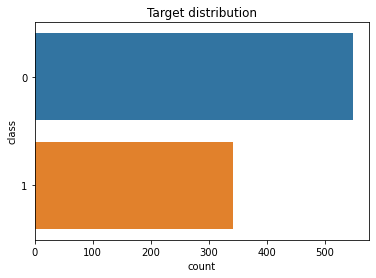

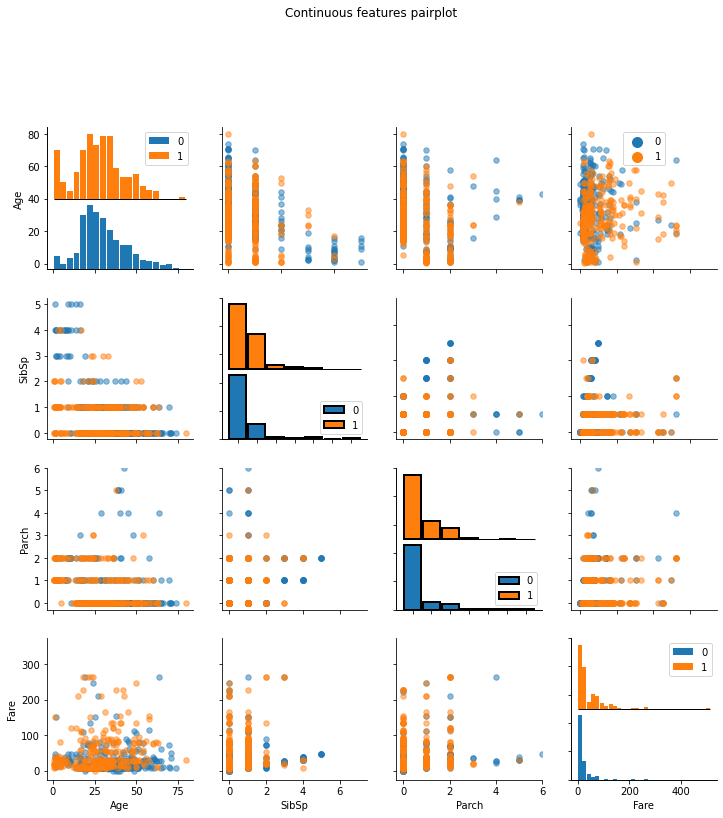

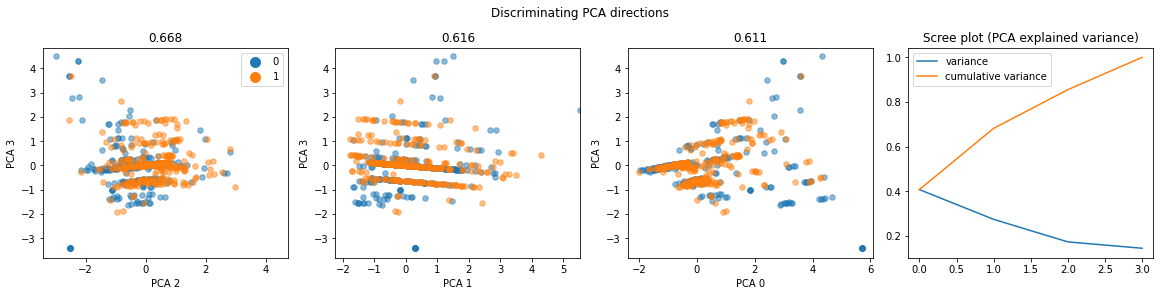

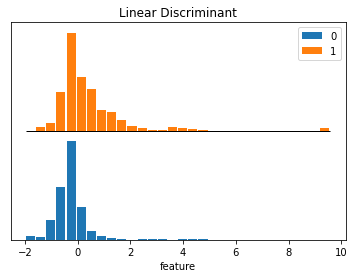

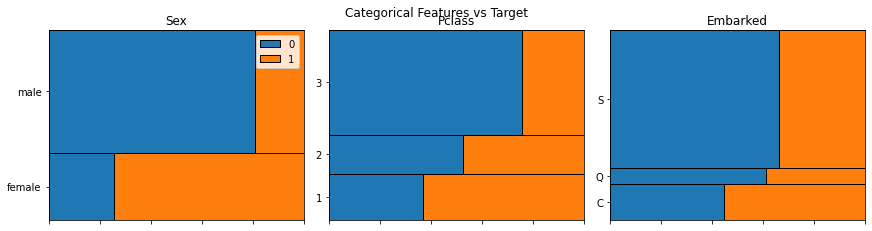

In [5]:
dabl.plot(titanic_df, target_col="Survived")

## Initial Model Building with dabl

In [6]:
ec = dabl.SimpleClassifier(random_state=0).fit(titanic_df, target_col="Survived")

Running DummyClassifier(strategy='prior')
accuracy: 0.616 average_precision: 0.384 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.381
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.616 average_precision: 0.384 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.381

Running GaussianNB()
accuracy: 0.424 average_precision: 0.737 roc_auc: 0.827 recall_macro: 0.529 f1_macro: 0.354
=== new best GaussianNB() (using recall_macro):
accuracy: 0.424 average_precision: 0.737 roc_auc: 0.827 recall_macro: 0.529 f1_macro: 0.354

Running MultinomialNB()
accuracy: 0.763 average_precision: 0.783 roc_auc: 0.831 recall_macro: 0.742 f1_macro: 0.746
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.763 average_precision: 0.783 roc_auc: 0.831 recall_macro: 0.742 f1_macro: 0.746

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.787 average_precision: 0.632 roc_auc: 0.767 recall_macro: 0.767 f1_macro: 0.771
=== new best DecisionTreeClas

# 2. Emot

In [7]:
# installation and importing the library
!pip install emot

In [8]:
import emot
text = "The weather is ☁️, we might need to carry our ☂️ :("

# Detecting emojis
emot.emoji(text)

{'flag': True,
 'location': [[15, 15], [46, 46]],
 'mean': [':cloud:', ':umbrella:'],
 'value': ['☁', '☂']}

In [9]:
# Detecting emoticons
emot.emoticons(text)

{'flag': True,
 'location': [[49, 51]],
 'mean': ['Frown, sad, andry or pouting'],
 'value': [':(']}

# 3. Flashtext

In [10]:
# installation and importing the library
!pip install flashtext -q

In [11]:
from flashtext import KeywordProcessor
twitter_df =  pd.read_csv('https://raw.githubusercontent.com/Branden-Kang/Python-practice/master/Data/twitter_train.csv')
twitter_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [12]:
corpus = ', '.join(twitter_df.text)
corpus[:1000]

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all, Forest fire near La Ronge Sask. Canada, All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected, 13,000 people receive #wildfires evacuation orders in California , Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school , #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires, #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas, I'm on top of the hill and I can see a fire in the woods..., There's an emergency evacuation happening now in the building across the street, I'm afraid that the tornado is coming to our area..., Three people died from the heat wave so far, Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding, #raining #flood

## Extract Keywords/searching for words in a corpus

In [13]:
processor = KeywordProcessor()
processor.add_keyword('flood')
found = processor.extract_keywords(corpus)
print(len(found))

58


## Replacing words in a text document

In [14]:
processor = KeywordProcessor(case_sensitive = False)
processor.add_keyword('forest fire','fire')
found = processor.replace_keywords(corpus)
print(found[:100])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all, fire near La Ronge Sask. Cana


# 4. SweetViz

In [15]:
# Installing the library
!pip install sweetviz

     |████████████████████████████████| 15.1MB 297kB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [16]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(titanic_df)
#display the report
advert_report.show_html('titanic.html')


Report titanic.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# 5. Numerizer

In [17]:
!pip install numerizer

  Created wheel for numerizer: filename=numerizer-0.1.5-py2.py3-none-any.whl size=4753 sha256=7d70df5bb3ea4492a4cbc196ff098e37b9bb5f1ef38e3a40faaf992d1cab1722
  Stored in directory: /root/.cache/pip/wheels/35/9d/61/67576a71b17fb33c9ae6c5282dea313a73a8c53958b0514150
Successfully built numerizer


In [18]:
from numerizer import numerize
numerize('forty two')

'42'

In [19]:
numerize('forty-two')

'42'

In [20]:
numerize('four hundred and sixty two')

'462'

In [21]:
numerize('twenty one thousand four hundred and seventy three')

'21473'

In [22]:
numerize('one billion and one')

'1000000001'

In [23]:
numerize('nine and three quarters')

'9.75'

In [24]:
numerize('platform nine and three quarters')

'platform 9.75'